In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales Data.csv')
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [4]:
df.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [5]:
df.duplicated().sum()

0

# Exploration

In [6]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
df.sample(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
88707,6367,200143,Wired Headphones,1,11.99,2019-05-06 23:16:00,"191 Lake St, New York City, NY 10001",5,11.99,New York City,23
183380,11040,220449,27in 4K Gaming Monitor,1,389.99,2019-06-20 12:15:00,"580 Park St, Dallas, TX 75001",6,389.99,Dallas,12
135710,19294,277755,Google Phone,1,600.00,2019-10-03 11:09:00,"38 Chestnut St, Boston, MA 02215",10,600.00,Boston,11
178813,6457,216061,USB-C Charging Cable,1,11.95,2019-06-27 16:10:00,"736 Spruce St, New York City, NY 10001",6,11.95,New York City,16
89521,7184,200914,Lightning Charging Cable,1,14.95,2019-05-02 19:18:00,"215 Ridge St, Los Angeles, CA 90001",5,14.95,Los Angeles,19
155224,8784,256579,Lightning Charging Cable,1,14.95,2019-09-03 22:42:00,"20 Lakeview St, Los Angeles, CA 90001",9,14.95,Los Angeles,22
171215,13188,235540,AA Batteries (4-pack),1,3.84,2019-07-01 06:44:00,"959 North St, Austin, TX 73301",7,3.84,Austin,6
155205,8765,256561,Lightning Charging Cable,1,14.95,2019-09-21 14:13:00,"482 Lakeview St, San Francisco, CA 94016",9,14.95,San Francisco,14
84428,2065,196044,AAA Batteries (4-pack),1,2.99,2019-05-18 10:22:00,"541 Church St, San Francisco, CA 94016",5,2.99,San Francisco,10
51615,8379,158494,Bose SoundSport Headphones,1,99.99,2019-02-10 18:58:00,"902 Cherry St, San Francisco, CA 94016",2,99.99,San Francisco,18


In [8]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


# Data Visualization

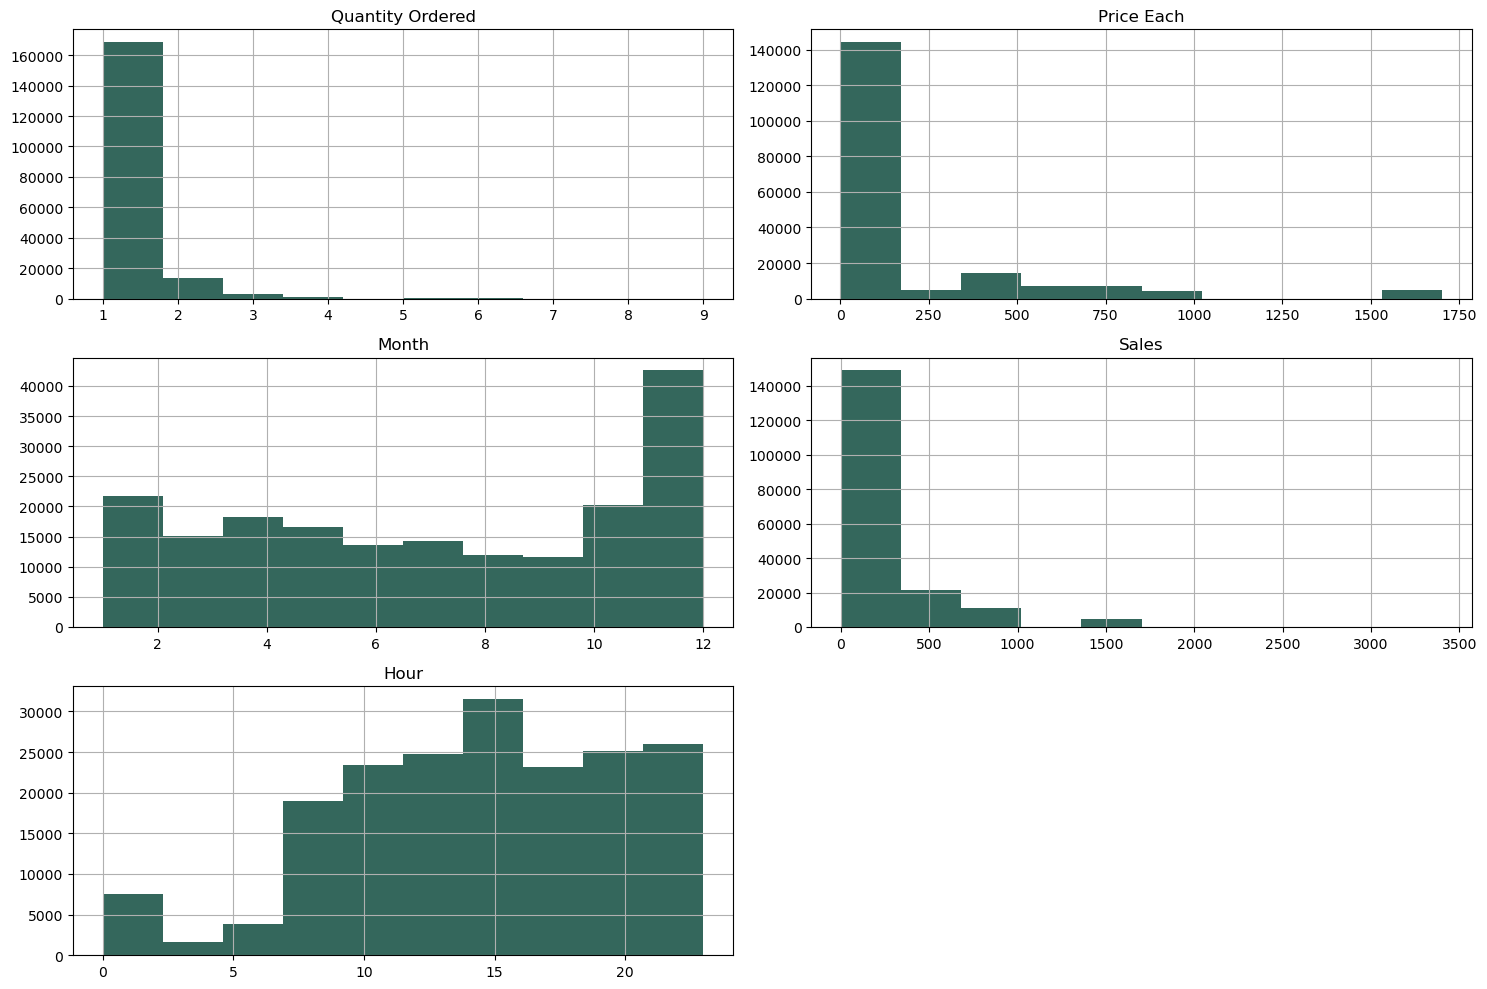

In [9]:
# Plotting histograms for numeric attributes
numeric_attributes = ['Quantity Ordered', 'Price Each', 'Month', 'Sales','Hour']
df[numeric_attributes].hist(bins=10, color = "#34675C", figsize=(15, 10))
plt.tight_layout()
plt.show()

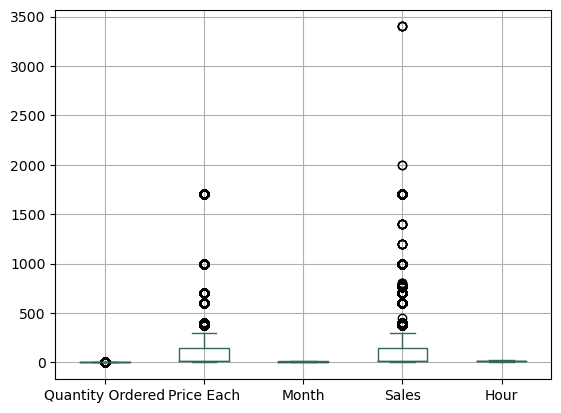

In [10]:
numeric_attributes = ['Quantity Ordered', 'Price Each', 'Month', 'Sales','Hour']
df[numeric_attributes].boxplot(color='#34675C')
plt.show()

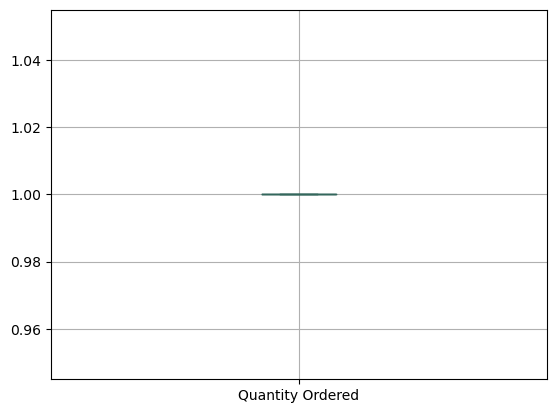

In [11]:
Q1 = df['Quantity Ordered'].quantile(.25)
Q3 = df['Quantity Ordered'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)
df = df[df['Quantity Ordered'].between(q1, q3)]
boxplot = df.boxplot(column=['Quantity Ordered'],color='#34675C')

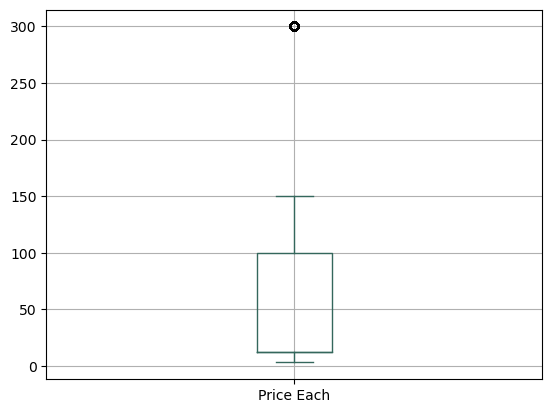

In [12]:
Q1 = df['Price Each'].quantile(.25)
Q3 = df['Price Each'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)
df = df[df['Price Each'].between(q1, q3)]
boxplot = df.boxplot(column=['Price Each'], color='#34675C')

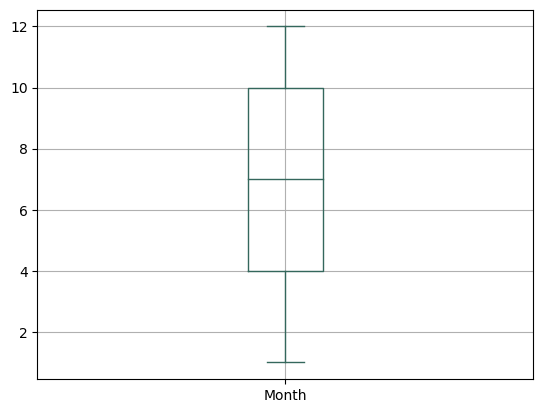

In [13]:
Q1 = df['Month'].quantile(.25)
Q3 = df['Month'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)
df = df[df['Month'].between(q1, q3)]
boxplot = df.boxplot(column=['Month'], color='#34675C')

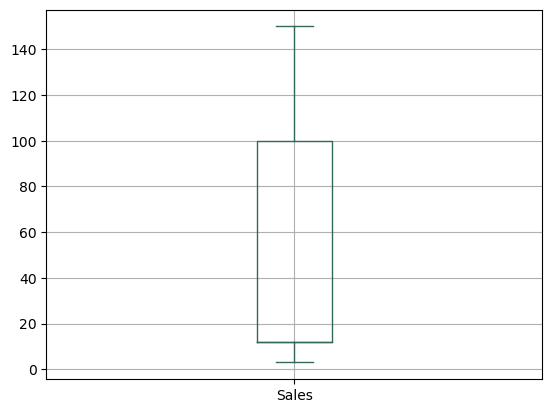

In [14]:
Q1 = df['Sales'].quantile(.25)
Q3 = df['Sales'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)
df = df[df['Sales'].between(q1, q3)]
boxplot = df.boxplot(column=['Sales'], color='#34675C')

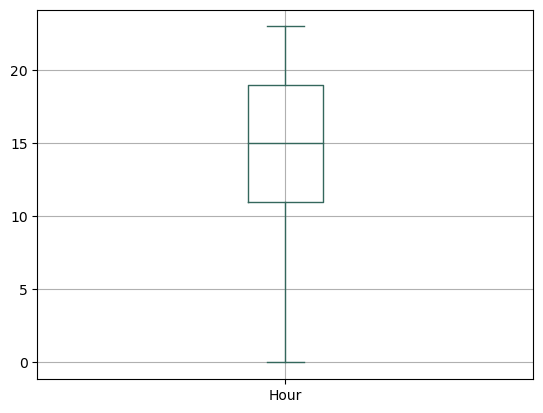

In [15]:
Q1 = df['Hour'].quantile(.25)
Q3 = df['Hour'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)
df = df[df['Hour'].between(q1, q3)]
boxplot = df.boxplot(column=['Hour'],color='#34675C')

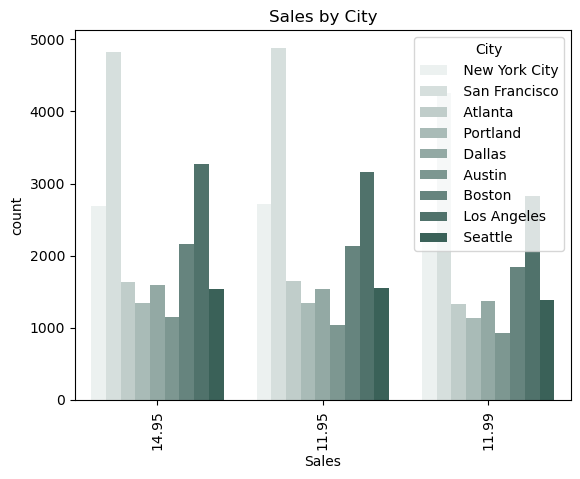

In [16]:
sns.countplot(df, x='Sales', hue= 'City',color="#34675C", order=df.Sales.value_counts().iloc[:3].index)
plt.title('Sales by City')
plt.xticks(rotation=90)
plt.show()

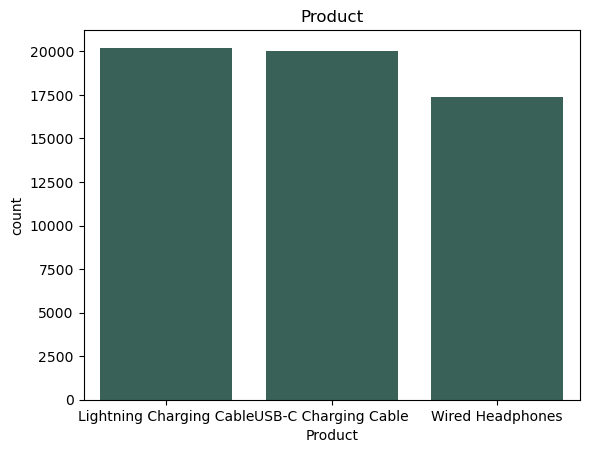

In [17]:
sns.countplot(df, x='Product',color="#34675C", order=df.Product.value_counts().iloc[:3].index)
plt.title('Product')
plt.show()

# Coorelation Matrix Heatmap

C:\Users\Sam\AppData\Local\Temp\ipykernel_5768\1250537800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='PuBuGn').set_title('Coorelation Heatmap')


Text(0.5, 1.0, 'Coorelation Heatmap')

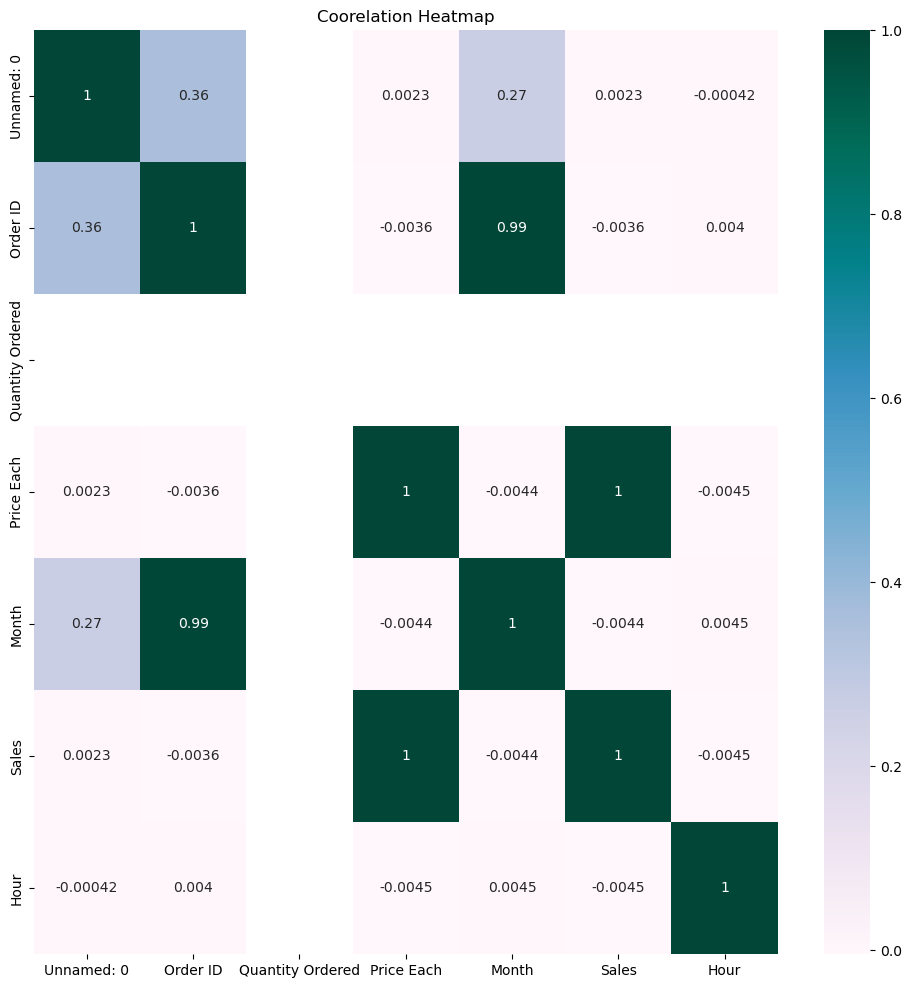

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='PuBuGn').set_title('Coorelation Heatmap')

In [19]:
df.to_csv('Sales.csv')